In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AI project/datasets/bank_term_deposit.csv')


## Exploratory Data Analysis

In [39]:
# Display the first 5 rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,balance_group,previous_contacts_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-60,Very High,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-50,Low,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-40,Very Low,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-50,High,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-40,Very Low,0


## 1: Is there a specific age group more likely to subscribe?

---


### Univariate Analysis - Age Distribution:

The histogram shows the distribution of customers' ages. Most customers are in their 30s to 50s, with fewer customers as age increases.

### Multivariate Analysis - Subscription Rate by Age Group:

The bar chart and accompanying data show the subscription rate within different age groups.

#### Younger Customers (<30):

There's a relatively high subscription rate among younger customers, at approximately 17.6%. This might be due to their higher risk tolerance or interest in growing their savings.

#### Middle-Aged Customers (30-60):

These groups have lower subscription rates, ranging from 9.1% to 10.6%. These customers might be more focused on expenses like mortgages, education, or are already invested in other financial products.

#### Older Customers (60+):

The subscription rate increases significantly for customers above 60, peaking for those above 90 at 77.8%. This could be due to a desire for more secure investments as they approach or are in retirement.

### Observations/Conclusions:

- Younger (<30) and older (>60) customers are more likely to subscribe to term deposits compared to middle-aged customers.
- The peak subscription rates are observed in the oldest age groups, which might indicate a preference for secure, low-risk investments among retirees or those planning for retirement.
- Targeting strategies might be more effective if they're tailored to these age groups, offering more aggressive growth opportunities for younger customers and stability for older ones.


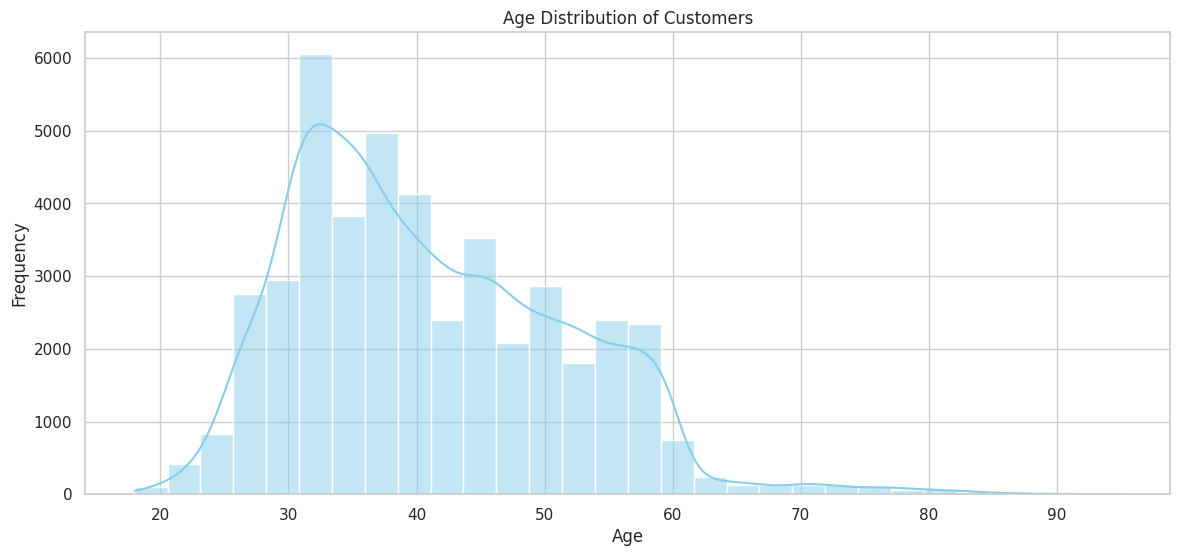

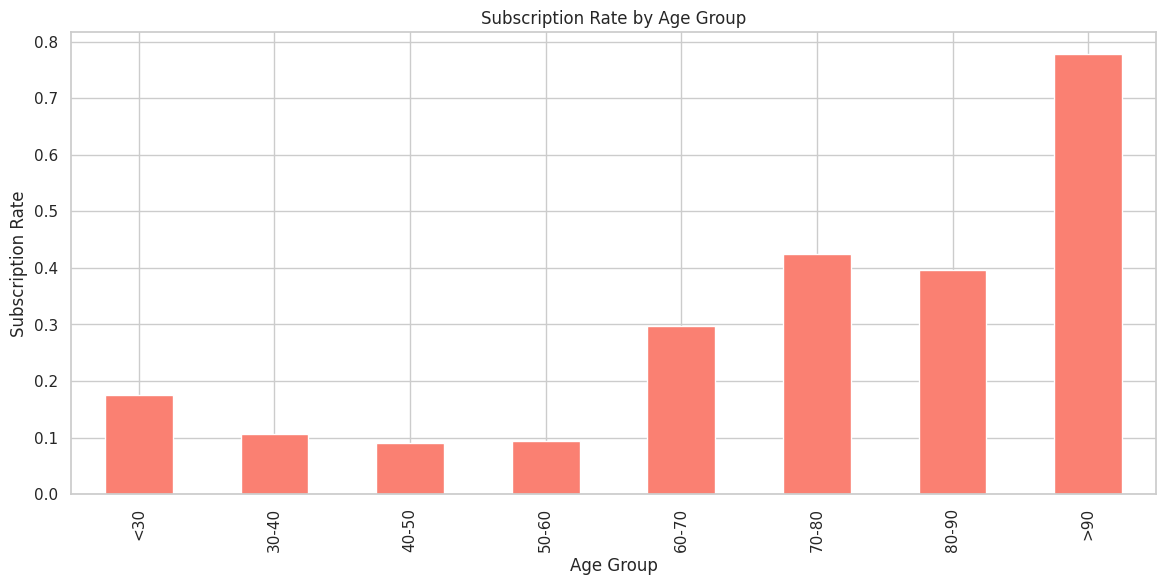

(None,
 age_group
 <30      0.175991
 30-40    0.105755
 40-50    0.091205
 50-60    0.093341
 60-70    0.296748
 70-80    0.424528
 80-90    0.396694
 >90      0.777778
 Name: yes, dtype: float64)

In [6]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Univariate Analysis: Age Distribution
plt.figure(figsize=(14, 6))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Creating age groups
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '>90']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Multivariate Analysis: Subscription Rate by Age Group
subscription_rate_by_age = data.groupby('age_group')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_age.plot(kind='bar', color='salmon')
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_age


## 2: Do customers with higher balances have a higher inclination to subscribe?

### Univariate Analysis - Balance Distribution:

The histogram shows the distribution of customers' average yearly balances. Most customers have a balance of less than €20,000, with the frequency tapering off as the balance increases.

### Multivariate Analysis - Subscription Rate by Balance Group:

The bar chart and data show the subscription rate within different balance groups.

### Observations/Conclusions:

- **Higher Balance, Higher Subscription Rate:** Customers in higher balance groups have a higher inclination to subscribe to term deposits. Those in the 'Very High' balance group have a subscription rate of approximately 16.4%, compared to just 6.96% in the 'Very Low' group.

- **Increasing Trend:** There's a clear increasing trend in subscription rates as balance groups move from 'Very Low' to 'Very High'. This suggests a correlation between the financial stability or wealth of a customer and their likelihood to invest in term deposits.

- **Potential Strategy:** Given this trend, marketing efforts might be more effective if targeted towards individuals with higher balances, as they're more likely to subscribe.

This analysis suggests a positive relationship between customer balances and their inclination to subscribe to term deposits. However, it's essential to consider other factors that might influence this trend, such as age, job, or economic conditions, in a more comprehensive analysis.


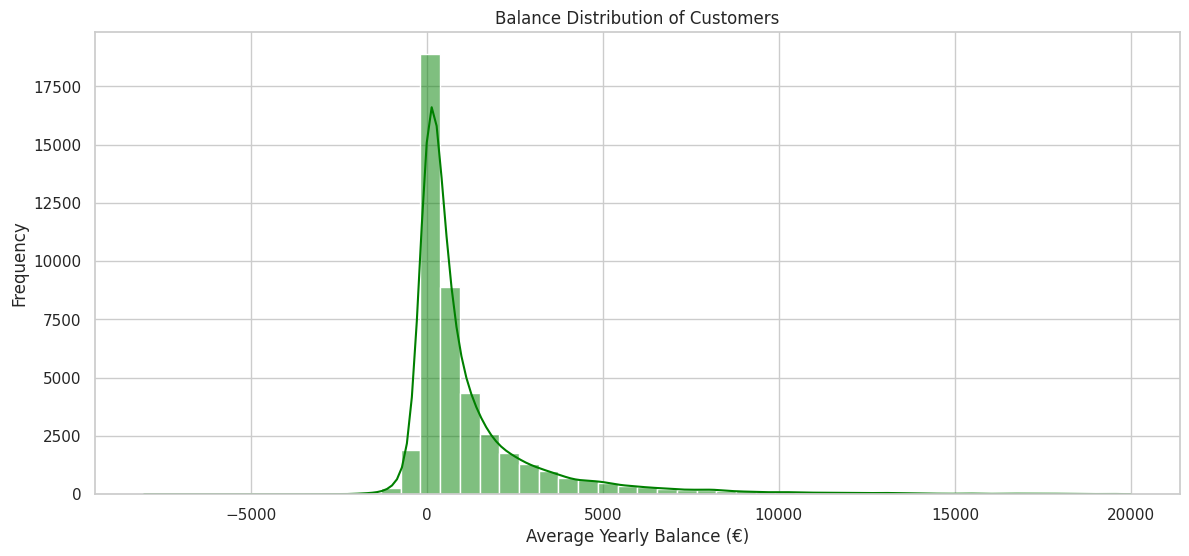

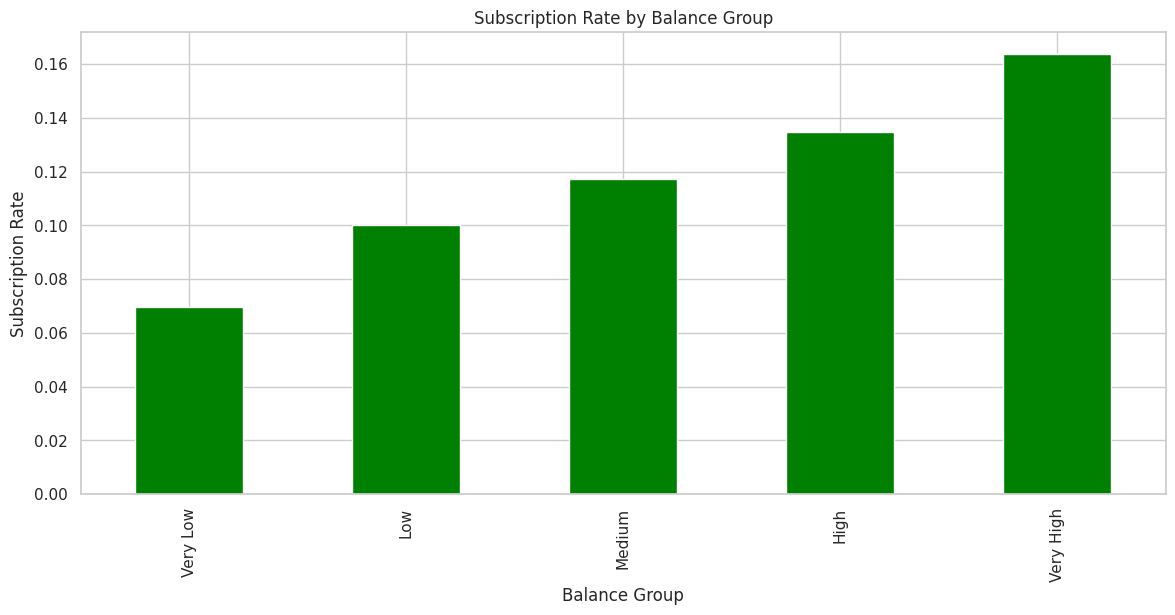

(None,
 balance_group
 Very Low     0.069590
 Low          0.100000
 Medium       0.117112
 High         0.134639
 Very High    0.163681
 Name: yes, dtype: float64)

In [7]:
# Question 2: Do customers with higher balances have a higher inclination to subscribe?

# Univariate Analysis: Balance Distribution
plt.figure(figsize=(14, 6))
sns.histplot(data[data['balance'] < 20000]['balance'], kde=True, bins=50, color='green')  # Limiting to 20,000 for better visibility
plt.title('Balance Distribution of Customers')
plt.xlabel('Average Yearly Balance (€)')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis: Balance vs. Subscription Status
# For better visualization and understanding, we'll categorize balances into groups
data['balance_group'] = pd.qcut(data['balance'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Calculating subscription rate by balance group
subscription_rate_by_balance = data.groupby('balance_group')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_balance.plot(kind='bar', color='green')
plt.title('Subscription Rate by Balance Group')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_balance

## 3: Are customers who responded positively in the past more likely to subscribe?

### Univariate Analysis - Previous Campaign Outcome Distribution:

The count plot displays the distribution of outcomes from the previous marketing campaign. Most customers have an 'unknown' outcome, followed by 'failure', 'other', and 'success'.

### Multivariate Analysis - Subscription Rate by Previous Campaign Outcome:

The bar chart and data show the subscription rate within different outcomes of the previous campaign.

### Observations/Conclusions:

- High Success Rate for Previous Success: Customers with a 'success' outcome in the previous campaign have a significantly higher subscription rate (~64.7%) compared to other groups. This suggests that customers who were interested in the past remain more likely to subscribe again.

- Lowest for Unknown and Failure: Those with 'unknown' and 'failure' outcomes have the lowest subscription rates, at around 9.16% and 12.6% respectively. This could be due to a lack of engagement or interest in the product.

- Moderate for 'Other': The 'other' category has a moderate subscription rate of about 16.7%, which might include various situations not captured by 'success' or 'failure'.

### Strategy Implications:

- Focus on Previously Successful Customers: Given the high subscription rate among customers who had a 'success' outcome in the past, it might be cost-effective to target these individuals again.

- Engagement for 'Unknown' and 'Failure': For those with 'unknown' or 'failure' outcomes, different engagement strategies or product offerings might be needed to spark interest.

- Further Investigation Needed: The 'other' category requires further investigation to understand what it entails and how these customers can be approached effectively.

This analysis indicates a strong relationship between positive responses in past campaigns and the likelihood of subscribing in the current campaign. Understanding and leveraging customer history can be crucial in designing effective marketing strategies.


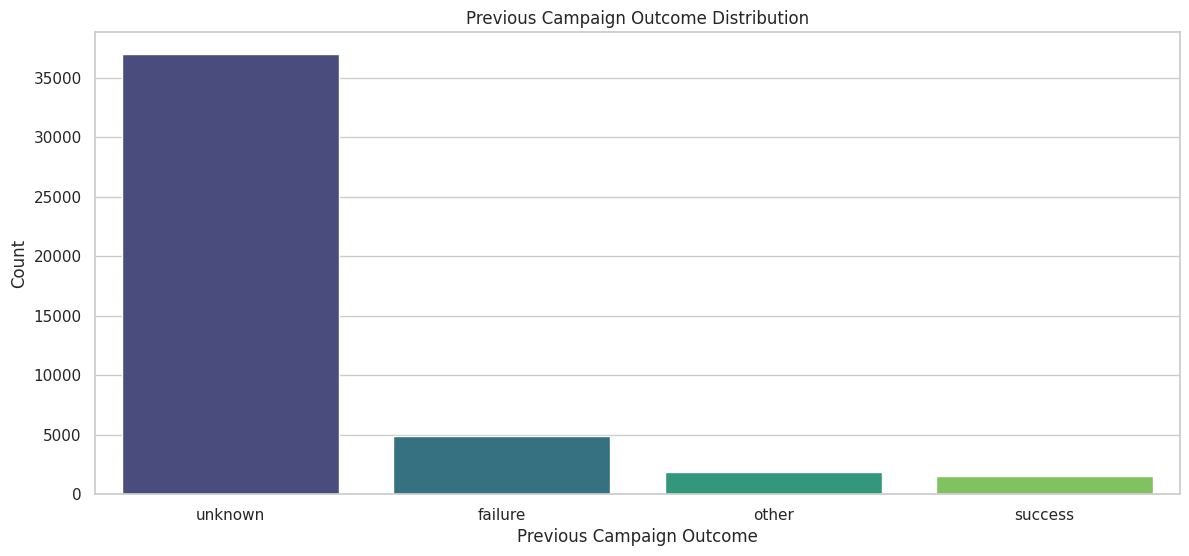

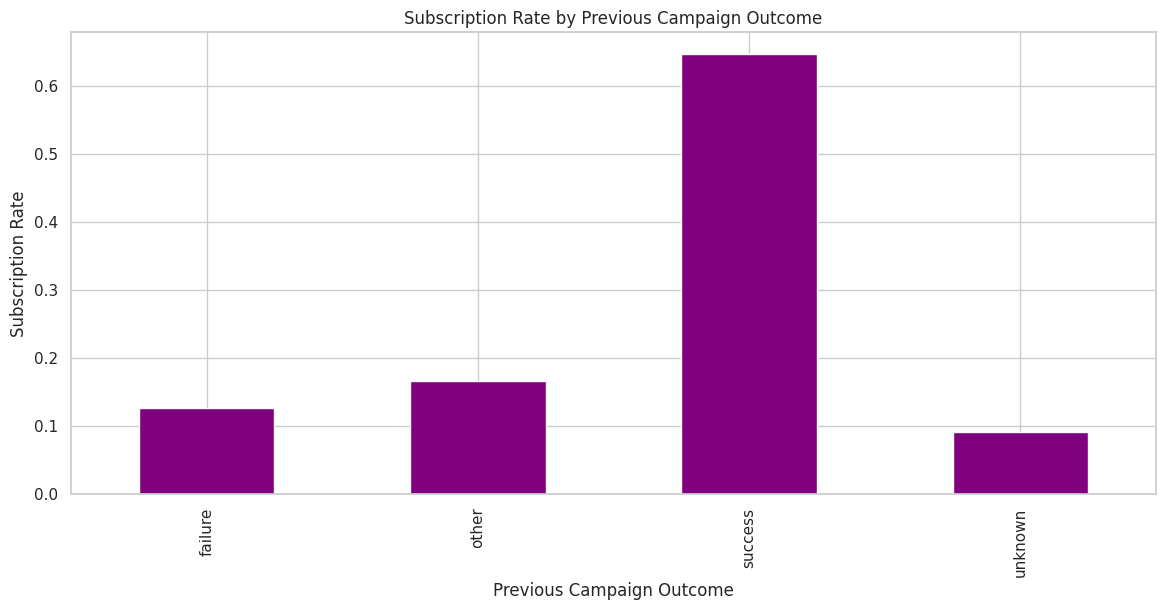

(None,
 poutcome
 failure    0.126097
 other      0.166848
 success    0.647253
 unknown    0.091615
 Name: yes, dtype: float64)

In [8]:
# Question 3: Are customers who responded positively in the past more likely to subscribe?

# Univariate Analysis: Previous Campaign Outcome Distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='poutcome', data=data, palette='viridis')
plt.title('Previous Campaign Outcome Distribution')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.show()

# Multivariate Analysis: Previous Campaign Outcome vs. Current Subscription
# Calculating subscription rate by previous campaign outcome
subscription_rate_by_poutcome = data.groupby('poutcome')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_poutcome.plot(kind='bar', color='purple')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_poutcome

## 4: How does having a personal loan or housing loan influence the probability of subscribing to a term deposit?

### Univariate Analysis - Loan Distribution:

The count plots show the distribution of customers with and without personal and housing loans. A larger number of customers have housing loans compared to personal loans.

### Multivariate Analysis - Subscription Rate by Loan Status:

The bar charts and data show the subscription rate among customers with and without personal and housing loans.

### Observations/Conclusions:

- Personal Loan:

  - Without Personal Loan: Customers without a personal loan have a higher subscription rate of approximately 12.7%.
  - With Personal Loan: Customers with a personal loan have a lower subscription rate of about 6.7%.

- Housing Loan:

  - Without Housing Loan: Customers without a housing loan have a higher subscription rate of approximately 16.7%.
  - With Housing Loan: Customers with a housing loan have a lower subscription rate of about 7.7%.

### Strategy Implications:

- Loan Status as a Factor: Both personal and housing loans negatively impact the likelihood of a customer subscribing to a term deposit. Customers without loans are more inclined to invest in term deposits, likely due to lower financial burdens.

- Targeting Strategy: Marketing efforts might be more effective if targeted towards individuals without personal or housing loans, as they're more likely to subscribe.

- Financial Planning Services: Offering financial planning or advice services might help in converting customers with loans, as they might be looking for ways to manage their finances better.

This analysis indicates that the absence of personal or housing loans is associated with a higher probability of subscribing to term deposits. Banks might consider this when segmenting customers for marketing term deposits.


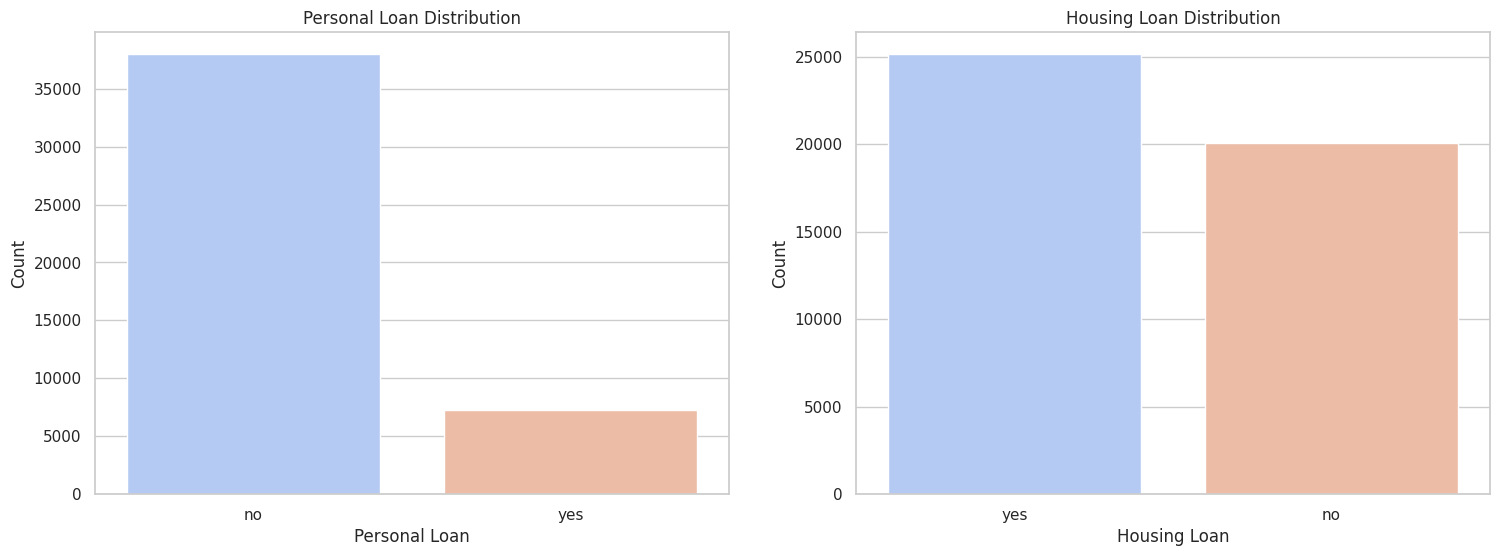

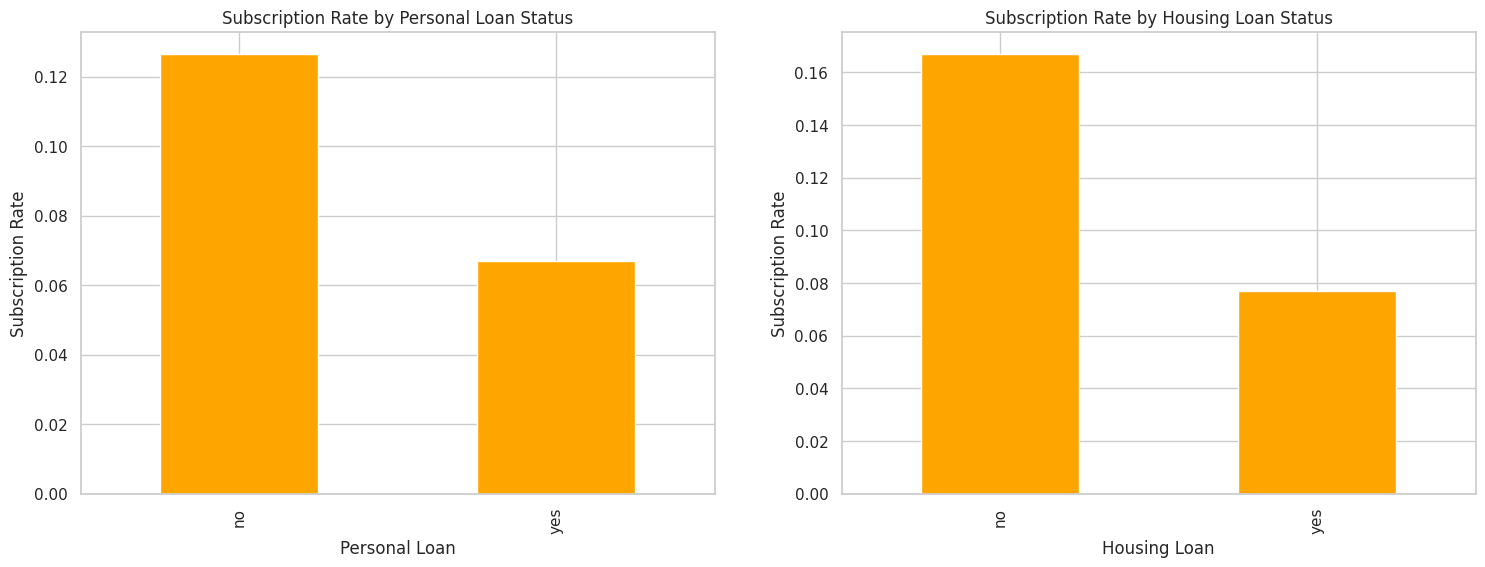

(loan
 no     0.126557
 yes    0.066814
 Name: yes, dtype: float64,
 housing
 no     0.167024
 yes    0.077000
 Name: yes, dtype: float64)

In [9]:
# Question 4: How does having a personal loan or housing loan influence the probability of subscribing to a term deposit?

# Univariate Analysis: Distribution of customers with and without personal and housing loans
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='loan', data=data, palette='coolwarm', ax=ax[0])
ax[0].set_title('Personal Loan Distribution')
ax[0].set_xlabel('Personal Loan')
ax[0].set_ylabel('Count')

sns.countplot(x='housing', data=data, palette='coolwarm', ax=ax[1])
ax[1].set_title('Housing Loan Distribution')
ax[1].set_xlabel('Housing Loan')
ax[1].set_ylabel('Count')

plt.show()

# Multivariate Analysis: Subscription Rate by Personal and Housing Loan Status
# Calculating subscription rates for personal and housing loans
subscription_rate_by_personal_loan = data.groupby('loan')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']
subscription_rate_by_housing_loan = data.groupby('housing')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

subscription_rate_by_personal_loan.plot(kind='bar', color='orange', ax=ax[0])
ax[0].set_title('Subscription Rate by Personal Loan Status')
ax[0].set_xlabel('Personal Loan')
ax[0].set_ylabel('Subscription Rate')

subscription_rate_by_housing_loan.plot(kind='bar', color='orange', ax=ax[1])
ax[1].set_title('Subscription Rate by Housing Loan Status')
ax[1].set_xlabel('Housing Loan')
ax[1].set_ylabel('Subscription Rate')

plt.show()

(subscription_rate_by_personal_loan, subscription_rate_by_housing_loan)

## 5: Are certain communication types more effective in promoting term deposit subscriptions?

### Univariate Analysis - Distribution of Communication Types:

The count plot shows the distribution of different communication types used to contact customers. 'Cellular' is the most common method, followed by 'unknown' and 'telephone'.

### Multivariate Analysis - Subscription Rate by Communication Type:

The bar chart and data show the subscription rate for different communication types.

### Observations/Conclusions:

- **Cellular:**
  - Highest Subscription Rate: Customers contacted via cellular phones have the highest subscription rate at approximately 14.9%. This could be due to the personal and direct nature of the communication.

- **Telephone:**
  - Moderately Effective: Customers contacted via telephone have a slightly lower subscription rate of about 13.4% compared to cellular. It's still relatively effective, possibly due to the direct interaction but might be less personal.

- **Unknown:**
  - Least Effective: The 'unknown' category has the lowest subscription rate at about 4.1%. Without knowing the specifics of this method, it's hard to analyze, but it's clear that it's less effective than known direct methods.

### Strategy Implications:

- Focus on Personal Communication: Personal and direct communication methods like cellular calls appear to be more effective in promoting term deposit subscriptions. Focusing on these methods might increase the success rate of the campaign.

- Reassess 'Unknown' Methods: It's essential to understand what the 'unknown' category entails and potentially reassess or improve these methods, as they are currently the least effective.

- Integrated Communication Strategy: An integrated approach using the most effective communication types might be beneficial. Understanding customer preferences for communication could further enhance the effectiveness.

This analysis indicates that the type of communication used significantly impacts the likelihood of a customer subscribing to a term deposit. Tailoring the communication strategy to use more effective methods could improve the success rate of future marketing campaigns.


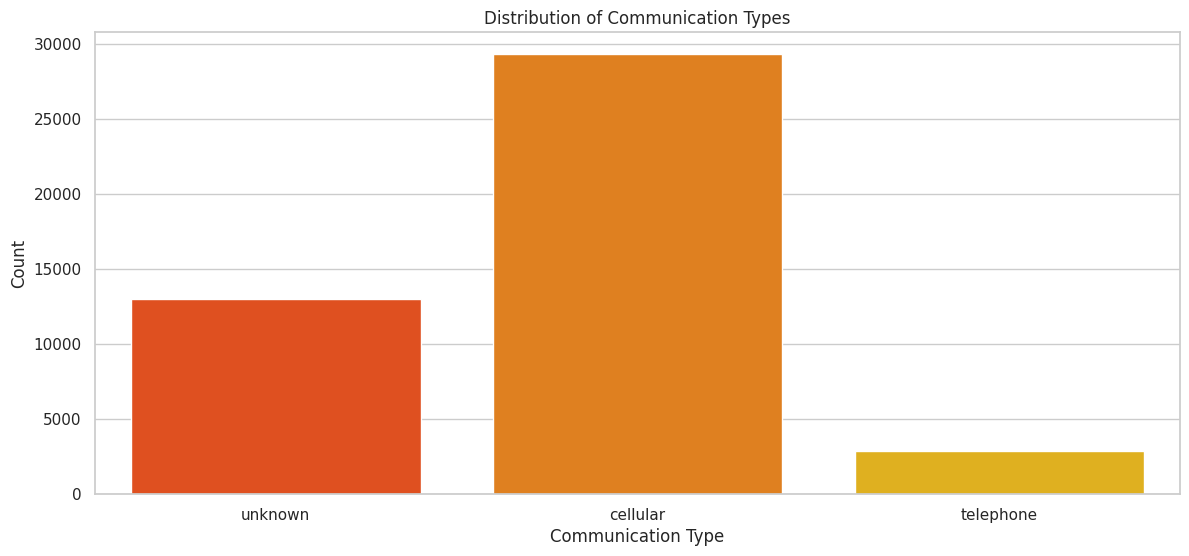

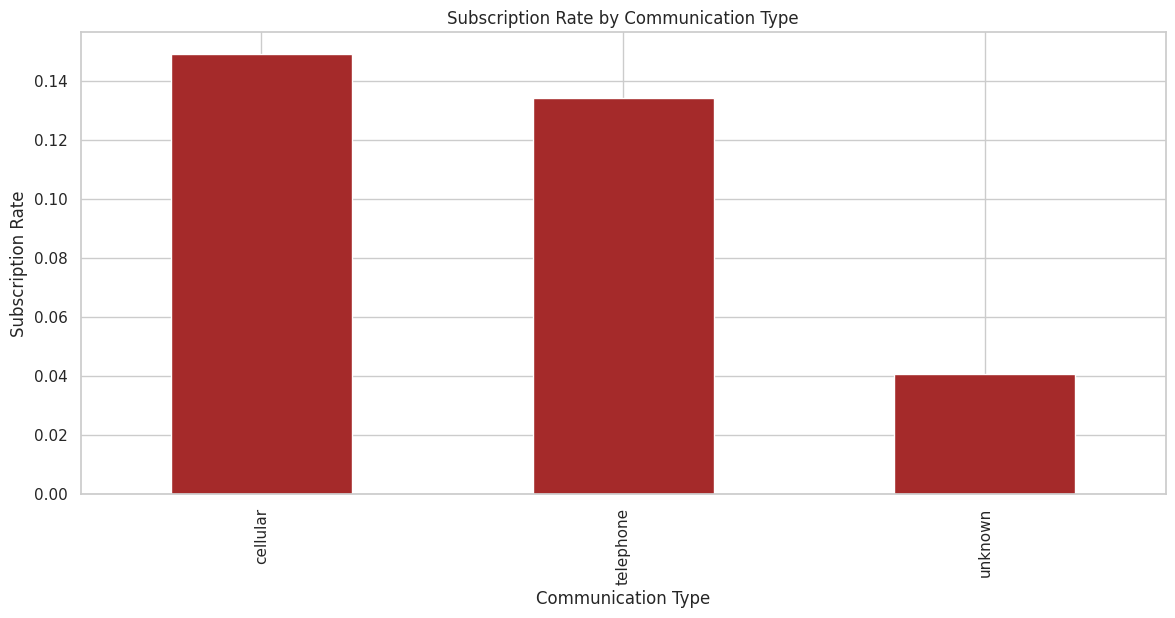

(None,
 contact
 cellular     0.149189
 telephone    0.134205
 unknown      0.040707
 Name: yes, dtype: float64)

In [10]:
# Question 5: Are certain communication types more effective in promoting term deposit subscriptions?

# Univariate Analysis: Distribution of Communication Types
plt.figure(figsize=(14, 6))
sns.countplot(x='contact', data=data, palette='autumn')
plt.title('Distribution of Communication Types')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.show()

# Multivariate Analysis: Subscription Rate by Communication Type
# Calculating subscription rates for different communication types
subscription_rate_by_contact = data.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_contact.plot(kind='bar', color='brown')
plt.title('Subscription Rate by Communication Type')
plt.xlabel('Communication Type')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_contact

## 6: Does the time passed since the last contact from a previous campaign (pdays) affect subscription rates?

### Univariate Analysis - Distribution of Days Passed Since Last Contact (pdays):

The histogram shows the distribution of days passed since the last contact for customers who were previously contacted (excluding those never contacted). Most re-contacts occur within a few hundred days.

### Multivariate Analysis - Days Since Last Contact vs. Subscription Status:

The scatter plot shows the relationship between the number of days since the last contact and the subscription status, with a numeric representation for subscription status (1 for subscribed).

### Mean Subscription Rate by Days Since Last Contact:

The line plot displays the mean subscription rate for different 'pdays'. It provides an understanding of how the subscription rate varies with the time elapsed since the last contact.

### Observations/Conclusions:

- Varying Subscription Rates: The mean subscription rate varies considerably with 'pdays'. It's not a simple linear relationship; instead, it fluctuates over different periods.

- Higher Rates at Certain Points: There are peaks in the subscription rate at certain 'pdays' values. This might indicate that contacting customers after a specific period following a previous campaign might be more effective.

- Data Distribution: The majority of re-contacts occur within a few hundred days, with fewer cases as 'pdays' increases. This skewness might affect the interpretation and requires a nuanced understanding.

### Strategy Implications:

- Timing Matters: The data suggests that the timing of contact after the last campaign can significantly impact the subscription rate. Identifying optimal timing for follow-ups might enhance the effectiveness of the campaign.

- Further Analysis Needed: A more granular analysis or a different approach might be needed to understand the full implications of 'pdays' on subscription rates, considering the varied nature of the data.

- Segmentation Strategy: Customers might be segmented based on their 'pdays' value, and different strategies could be employed for each segment to maximize the subscription rate.

This analysis indicates that the time passed since the last contact does have an influence on subscription rates, but the relationship is complex and might be influenced by various factors. Understanding and leveraging this relationship can be crucial in designing effective follow-up strategies for marketing campaigns.


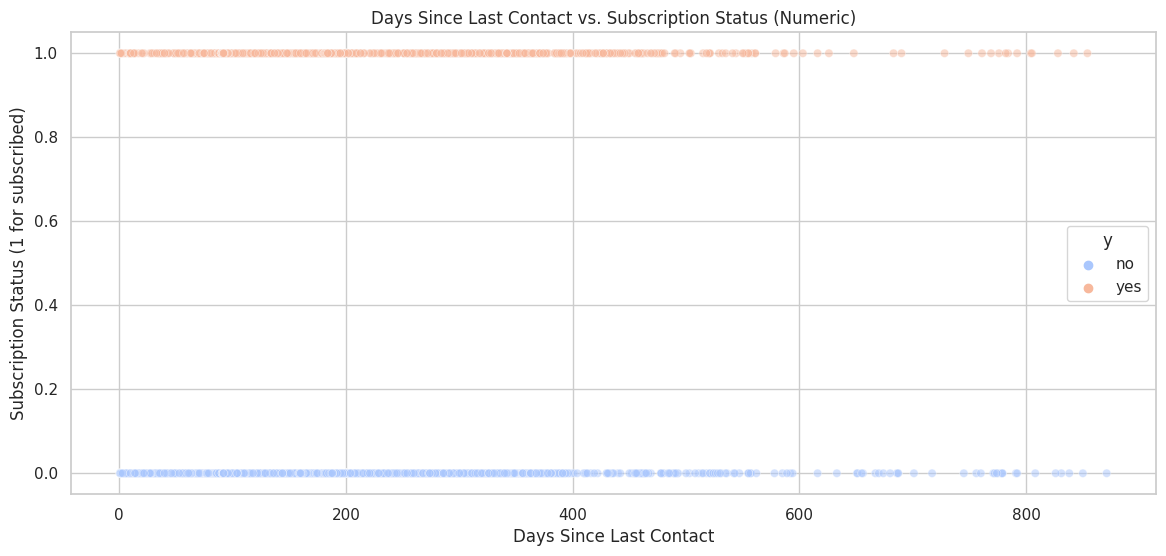

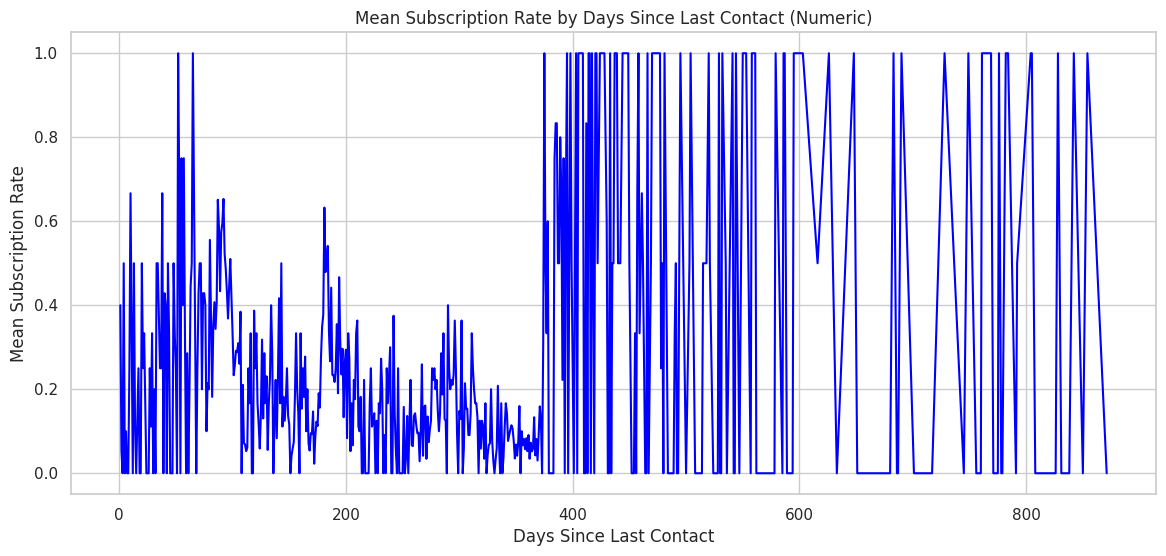

(None,
 count    558.000000
 mean       0.290058
 std        0.322041
 min        0.000000
 25%        0.030792
 50%        0.166667
 75%        0.431467
 max        1.000000
 Name: y_numeric, dtype: float64)

In [11]:
# Converting the 'y' column to numeric format for analysis
data_numeric = data.copy()
data_numeric['y_numeric'] = data_numeric['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Filtering out cases where pdays is -1 (meaning the customer was not previously contacted)
filtered_data_numeric = data_numeric[data_numeric['pdays'] != -1]

plt.figure(figsize=(14, 6))

# Scatter plot to show the relationship between pdays and subscription status
sns.scatterplot(x='pdays', y='y_numeric', data=filtered_data_numeric, alpha=0.5, hue='y', palette='coolwarm')
plt.title('Days Since Last Contact vs. Subscription Status (Numeric)')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Subscription Status (1 for subscribed)')
plt.show()

# Calculating the mean subscription rate for different pdays
mean_subscription_rate_by_pdays_numeric = filtered_data_numeric.groupby('pdays')['y_numeric'].mean()

plt.figure(figsize=(14, 6))
mean_subscription_rate_by_pdays_numeric.plot(kind='line', color='blue')
plt.title('Mean Subscription Rate by Days Since Last Contact (Numeric)')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Mean Subscription Rate')
plt.show(), mean_subscription_rate_by_pdays_numeric.describe()


## 7: Are customers with higher education levels more likely to subscribe?

### Univariate Analysis - Distribution of Education Levels:

The count plot shows the distribution of customers across different education levels. Most customers have secondary education, followed by tertiary, primary, and a few unknowns.

### Multivariate Analysis - Subscription Rate by Education Level:

The bar chart and data show the subscription rate within different education levels.

### Observations/Conclusions:

- Tertiary Education: Customers with tertiary (higher) education have the highest subscription rate at approximately 15%. This suggests that those with higher education levels might better understand the benefits of term deposits or have more financial stability to invest.

- Secondary Education: Customers with secondary education have a moderate subscription rate of about 10.6%.

- Primary Education: Those with primary education have the lowest subscription rate among the known categories at approximately 8.6%.

- Unknown Education: Interestingly, the subscription rate for customers with an unknown education level is relatively high at about 13.6%, which might suggest a varied or specific subgroup.

### Strategy Implications:

- Target Higher Education Levels: The data suggests that targeting customers with tertiary education might be more effective due to their higher subscription rates.

- Customized Communication: Tailoring the communication and information complexity based on the customer's education level might improve engagement and understanding, potentially leading to higher subscription rates.

- Understanding 'Unknown': Further investigation into the 'unknown' category might reveal a specific customer segment that could be effectively targeted.

This analysis indicates that education level is a significant factor in determining the likelihood of subscribing to a term deposit, with higher education correlating with a higher subscription rate. Banks might consider this when segmenting customers and tailoring their marketing strategies.


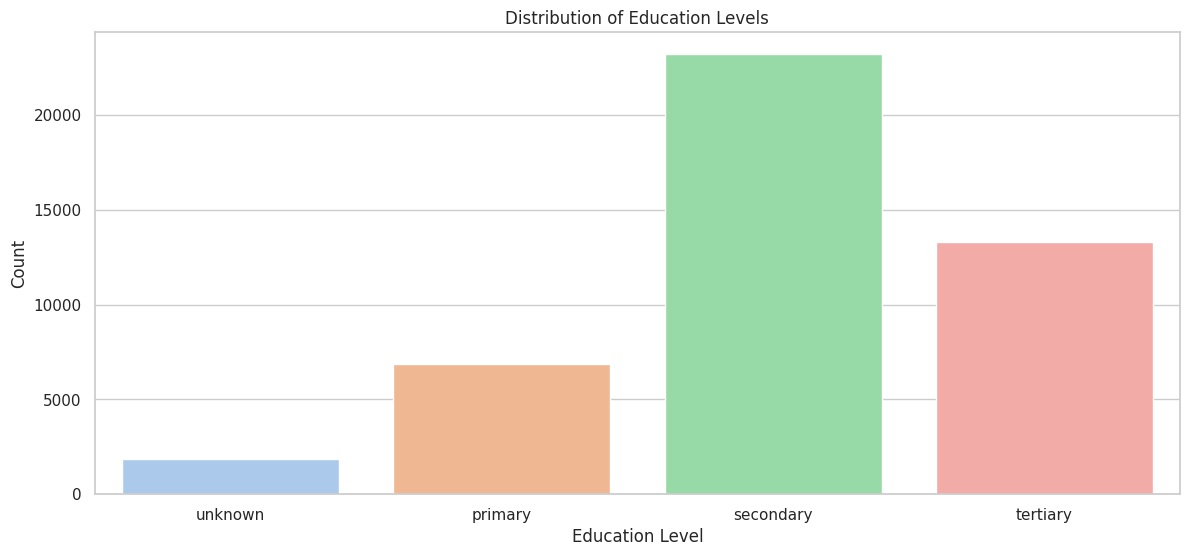

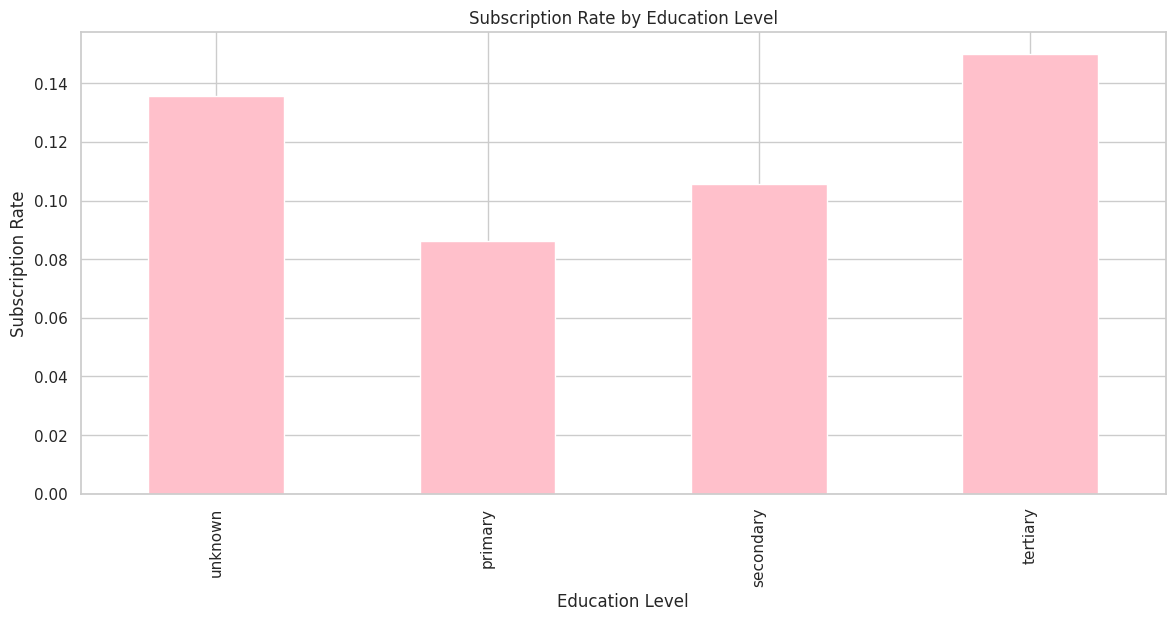

(None,
 education
 primary      0.086265
 secondary    0.105594
 tertiary     0.150064
 unknown      0.135703
 Name: yes, dtype: float64)

In [12]:
# Question 7: Are customers with higher education levels more likely to subscribe?

# Univariate Analysis: Distribution of Education Levels
plt.figure(figsize=(14, 6))
sns.countplot(x='education', data=data, order=['unknown', 'primary', 'secondary', 'tertiary'], palette='pastel')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Multivariate Analysis: Subscription Rate by Education Level
# Calculating subscription rates for different education levels
subscription_rate_by_education = data.groupby('education')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_education.reindex(['unknown', 'primary', 'secondary', 'tertiary']).plot(kind='bar', color='pink')
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_education

## 8: Is there a correlation between job types and subscription rates?

### Univariate Analysis - Distribution of Job Types:

The count plot shows the distribution of customers across different job types. The most common job types are blue-collar, management, technician, and admin, with fewer customers in other categories.

### Multivariate Analysis - Subscription Rate by Job Type:

The bar chart and data show the subscription rate within different job types, sorted for easier interpretation.

### Observations/Conclusions:

- Higher Rates Among Students and Retired: Students and retired individuals have the highest subscription rates at approximately 28.7% and 22.8%, respectively. This might be due to the more stable and long-term financial planning associated with these stages of life.

- Management and Unemployed: Those in management and unemployed individuals also have relatively higher subscription rates, at about 13.8% and 15.5%. While different, both groups might have specific reasons to invest in term deposits – financial growth for the former and security for the latter.

- Lower Rates Among Blue-Collar and Entrepreneurs: Blue-collar workers and entrepreneurs have lower subscription rates, around 7.3% and 8.3% respectively. The financial stability or priorities of these groups might differ, leading to lower rates.

### Strategy Implications:

- Targeting Specific Groups: Knowing which job types are more likely to subscribe can help tailor marketing strategies. Students and retired individuals, for example, might be targeted with long-term investment plans.

- Understanding Needs and Preferences: Different job types might have varying financial needs and preferences. Understanding these can help in offering more relevant and attractive term deposit plans.

- Diverse Communication Strategies: Different job types might respond better to different types of communication, so strategies might be tailored accordingly.

This analysis indicates a correlation between job types and subscription rates, with certain professions like students and retired individuals showing a higher likelihood to subscribe to term deposits. Recognizing and understanding these trends can significantly impact the effectiveness of marketing campaigns.


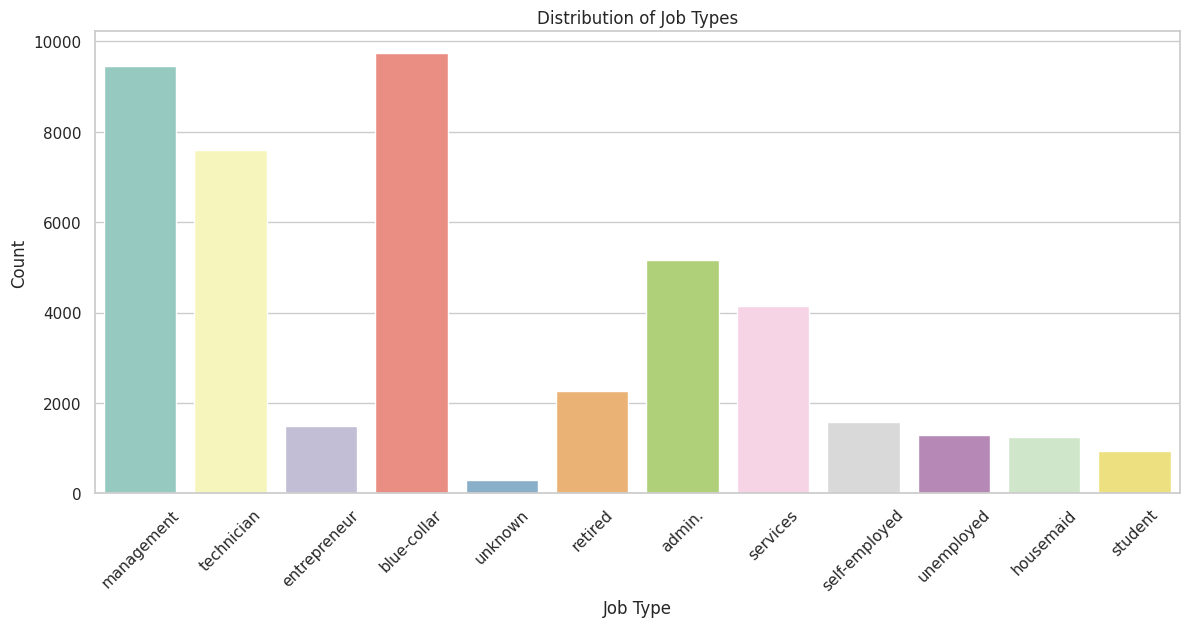

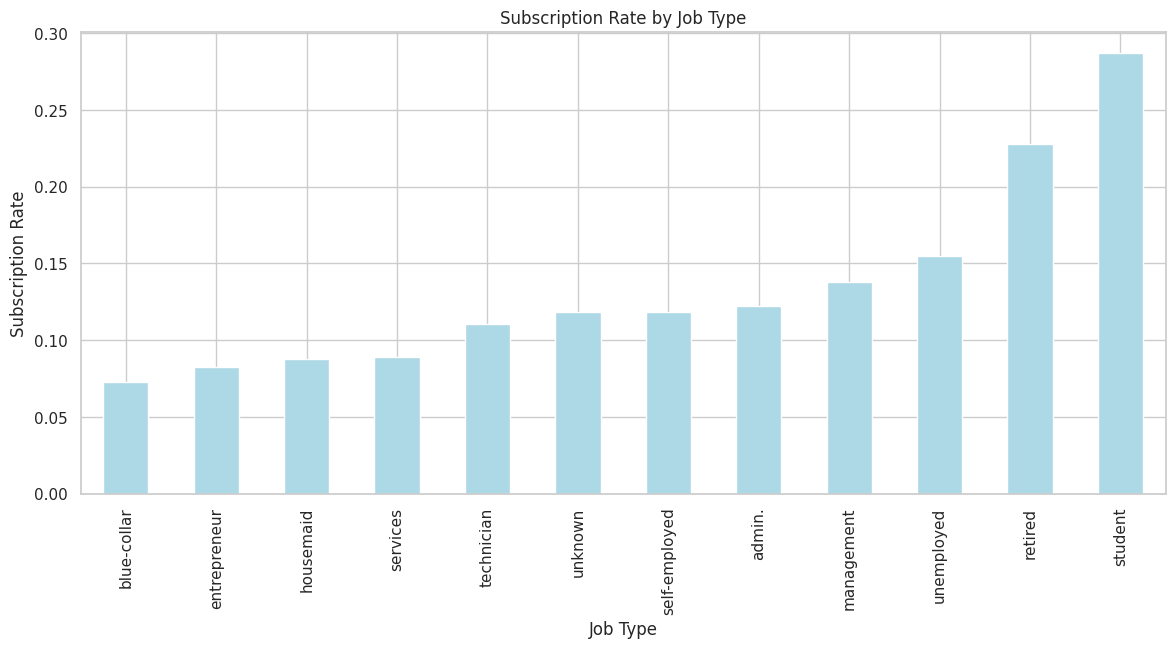

(None,
 job
 blue-collar      0.072750
 entrepreneur     0.082717
 housemaid        0.087903
 services         0.088830
 technician       0.110570
 unknown          0.118056
 self-employed    0.118429
 admin.           0.122027
 management       0.137556
 unemployed       0.155027
 retired          0.227915
 student          0.286780
 Name: yes, dtype: float64)

In [13]:
# Question 8: Is there a correlation between job types and subscription rates?

# Univariate Analysis: Distribution of Job Types
plt.figure(figsize=(14, 6))
sns.countplot(x='job', data=data, palette='Set3')
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Multivariate Analysis: Subscription Rate by Job Type
# Calculating subscription rates for different job types
subscription_rate_by_job = data.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_job.sort_values().plot(kind='bar', color='lightblue')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_job.sort_values()

## 9: Is there an optimal number of previous contacts for higher subscription likelihood?

### Univariate Analysis - Distribution of Number of Previous Contacts:

The histogram shows the distribution of the number of previous contacts. Most customers have been contacted less than 10 times, with very few having more than 20 previous contacts.

### Multivariate Analysis - Subscription Rate by Number of Previous Contacts:

The bar chart and data show the subscription rate within different ranges of previous contacts.

### Observations/Conclusions:

- Increasing Trend Up to a Point: The subscription rate generally increases with the number of previous contacts, peaking at the '6-10' range with about 29.4% subscription rate. This suggests that repeated contact can be beneficial up to a point.

- Decline After Certain Threshold: After reaching a peak at '6-10' contacts, the subscription rate declines for the '11-20' and '21-50' groups to about 19.2% and 11.8%, respectively. This might indicate that too many contacts can lead to disinterest or annoyance.

- Exceptionally High Rate for '>50' Contacts: The '>50' contacts group shows an exceptionally high subscription rate of 66.7%, but this is likely due to a very small sample size and might not be statistically significant.

### Strategy Implications:

- Identify the Sweet Spot: The data suggests that there might be an optimal range of previous contacts (around 6-10) where customers are more likely to subscribe. Identifying this sweet spot for different customer segments can improve the effectiveness of the campaign.

- Avoid Over-Contacting: Too many contacts seem to reduce the likelihood of subscription. It's essential to balance persistence with the risk of annoying the customer.

- Personalize Follow-Ups: The effectiveness of previous contacts might also depend on the quality and relevance of the communication. Personalizing follow-up strategies might help in maintaining customer interest over multiple contacts.

This analysis indicates that while repeated contact can be beneficial, there is likely an optimal range beyond which the likelihood of subscription declines. Understanding and leveraging this relationship can significantly impact the success of marketing campaigns.


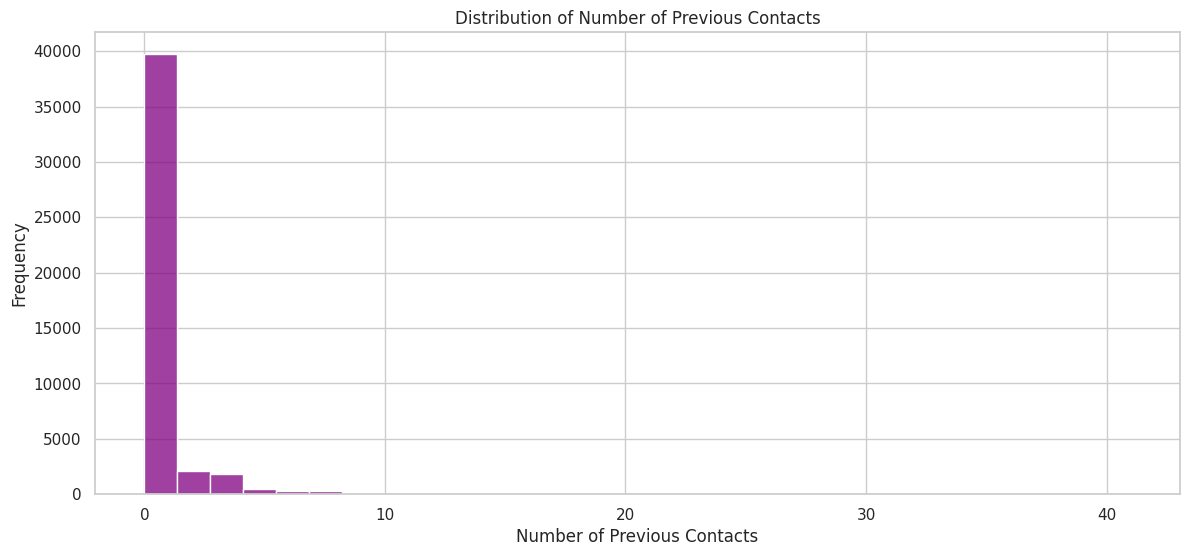

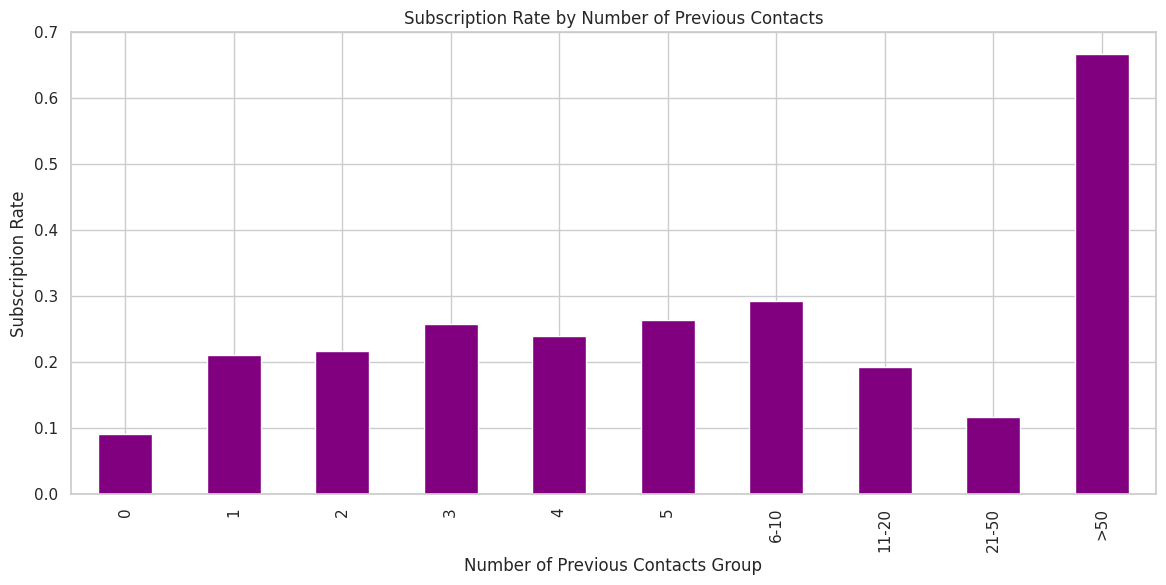

(None,
 previous_contacts_group
 0        0.091573
 1        0.210317
 2        0.216524
 3        0.257443
 4        0.239496
 5        0.263617
 6-10     0.293506
 11-20    0.192469
 21-50    0.117647
 >50      0.666667
 Name: yes, dtype: float64)

In [14]:
# Question 9: Is there an optimal number of previous contacts for higher subscription likelihood?

# Univariate Analysis: Distribution of Number of Previous Contacts
plt.figure(figsize=(14, 6))
sns.histplot(data[data['previous'] < 50]['previous'], bins=30, kde=False, color='purple')  # Limiting to 50 for better visibility
plt.title('Distribution of Number of Previous Contacts')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Frequency')
plt.show()

# Multivariate Analysis: Subscription Rate by Number of Previous Contacts
# For better visualization and understanding, we'll categorize 'previous' into ranges
data['previous_contacts_group'] = pd.cut(data['previous'],
                                         bins=[-1, 0, 1, 2, 3, 4, 5, 10, 20, 50, 100],
                                         labels=['0', '1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '>50'])

# Calculating subscription rates for different 'previous' groups
subscription_rate_by_previous_contacts = data.groupby('previous_contacts_group')['y'].value_counts(normalize=True).unstack().fillna(0)['yes']

plt.figure(figsize=(14, 6))
subscription_rate_by_previous_contacts.plot(kind='bar', color='purple')
plt.title('Subscription Rate by Number of Previous Contacts')
plt.xlabel('Number of Previous Contacts Group')
plt.ylabel('Subscription Rate')
plt.show(), subscription_rate_by_previous_contacts


## Correlation Matrix for Independent variables

<ipython-input-17-916cb7bd5f1d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = independent_variables.corr()


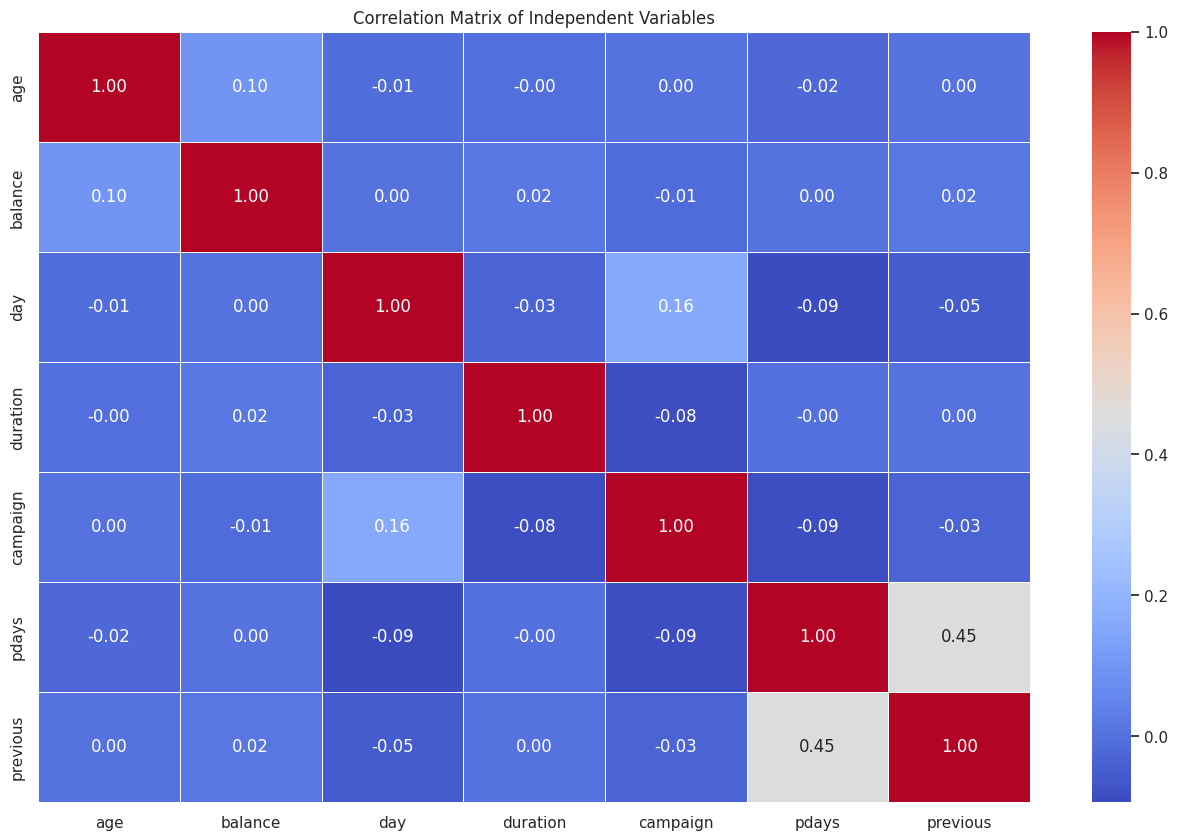

In [17]:
# Calculate the correlation matrix for independent variables
independent_variables = data.drop('y', axis=1)
correlation_matrix = independent_variables.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()



# EXPERIMENTATION AND MODELLING

In [42]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove the target variable from the categorical columns

# Preprocessing for numerical data: Imputation followed by Scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Preprocessing for categorical data: Imputation followed by One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical features
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the target and features
X = data.drop('y', axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert target variable to binary

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dimensions of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((36168, 19), (9042, 19), (36168,), (9042,))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the pipeline: Preprocessing followed by Logistic Regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Train the Logistic Regression model
pipeline.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = pipeline.predict(X_test)

# Calculate the accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, class_report


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8988167643481145,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.94      7952\n           1       0.65      0.34      0.45      1091\n\n    accuracy                           0.90      9043\n   macro avg       0.79      0.66      0.70      9043\nweighted avg       0.88      0.90      0.88      9043\n')

The model performs well in identifying customers who won't subscribe (class 0) but struggles more with identifying those who will (class 1), as indicated by the lower recall and F1-score for class 1. This is a common issue in imbalanced datasets where one class significantly outnumbers the other.
# Model Performance Summary

The model's performance has been evaluated, and here are the key metrics:

## Accuracy

- **Accuracy:** Approximately 89.88%.
    - This indicates that the model correctly predicted whether a customer would subscribe to a term deposit for about 89.88% of the cases in the test set.

## Classification Report

### Precision

- **Class 0 (No Subscription):** 92%
    - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- **Class 1 (Subscribed):** 65%
    - This represents the model's accuracy in identifying customers who actually subscribed.

### Recall

- **Class 0 (No Subscription):** 98%
    - Recall is the ratio of correctly predicted positive observations to all observations in the actual class.
- **Class 1 (Subscribed):** 34%
    - This indicates how well the model is capturing the actual subscribers.

### F1-Score

- **Class 0 (No Subscription):** 94%
- **Class 1 (Subscribed):** 45%
    - The F1-Score is the weighted average of Precision and Recall, representing the balance between them.
    - It is a measure of the test's accuracy, considering both false positives and false negatives.

### Support

- **Class 0 (No Subscription):** 7,952 instances
- **Class 1 (Subscribed):** 1,091 instances
    - Support is the number of actual occurrences of each class in the specified dataset, providing a basis for the above metrics.

## Observations
- The model performs well in identifying customers who won't subscribe but struggles with identifying those who will, as indicated by the lower recall and F1-score for class 1. This is common in imbalanced datasets.

## Recommendations
- **Addressing Class Imbalance:** Consider techniques like oversampling or undersampling.
- **Hyperparameter Tuning:** Experiment with different settings for the Logistic Regression model.
- **Feature Engineering:** Consider creating additional features based on domain knowledge.
- **Alternative Models:** Explore other models like Random Forest or Gradient Boosting for potentially better performance.
  
    
    

In [29]:
from sklearn.metrics import precision_recall_fscore_support

# Extracting precision, recall, f1-score, and support
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# Creating a DataFrame for a cleaner display
metrics_summary = pd.DataFrame({
    'Class': ['0 (Not Subscribed)', '1 (Subscribed)', 'Accuracy'],
    'Precision': np.append(precision, np.nan),
    'Recall': np.append(recall, np.nan),
    'F1-Score': np.append(f1, accuracy),
    'Support': np.append(support, np.nan)
})

metrics_summary

,Class,Precision,Recall,F1-Score,Support
0,0 (Not Subscribed),0.915162,0.975352,0.944299,7952.0
1,1 (Subscribed),0.654930,0.340972,0.448463,1091.0
2,Accuracy,NaN,NaN,0.898817,NaN


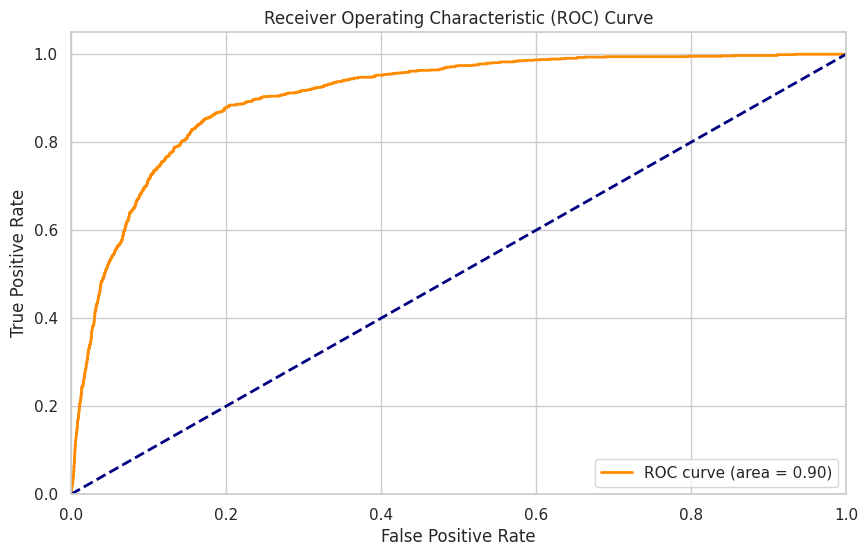

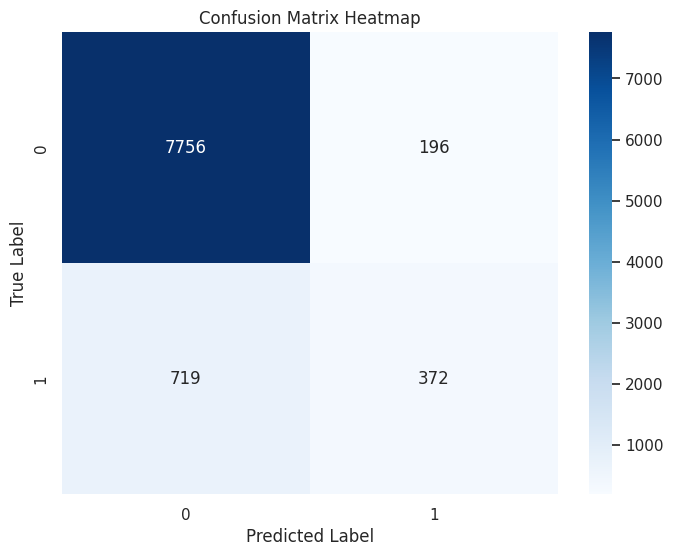

In [32]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
